In [2]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib
import networkx as nx

## Suzhou

### Importing Useful Data

In [14]:
GEO_metadata = pd.read_csv('Suzhou/data_storage/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')

In [3]:
metadata = pd.read_csv('Suzhou/data_storage/metadata.csv', sep='\t', index_col='Unnamed: 0')

In [4]:
GEO_metadata.columns

Index(['y', 'x', 'street_count', 'bc', 'pr', 'dg', 'cl', 'highway', 'ref',
       'geometry', 'index', 'index.1', 'candownload', 'url_c', 'url_q',
       'url_n', 'url_largest', 'owner', 'owner_loc', 'title', 'description',
       'comments', 'taken', 'views', 'people', 'tags', 'lat', 'lon',
       'neighbourhood', 'url', 'local', 'tag_list', 'tag_len', 'NOT', 'year',
       'time', 'week', 'unique_week', 'Chinese', 'English', 'Other_Lang',
       'num_sent', 'revised_text', 'text_data', 'text_len', 'GEO_node',
       'posts_num'],
      dtype='object')

In [5]:
GEO_metadata

,y,x,street_count,bc,pr,dg,cl,highway,ref,geometry,...,unique_week,Chinese,English,Other_Lang,num_sent,revised_text,text_data,text_len,GEO_node,posts_num
0,31.290534,120.642004,3,0.002049,0.000075,0.000829,0.003205,NaN,NaN,POINT (120.6420043 31.2905339),...,202205,1.0,0.0,0.0,1.0,It has title of Extinction Bridge,. It has title ...,6.0,8017590880,18
1,31.290534,120.642004,3,0.002049,0.000075,0.000829,0.003205,NaN,NaN,POINT (120.6420043 31.2905339),...,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN,8017590880,18
2,31.290534,120.642004,3,0.002049,0.000075,0.000829,0.003205,NaN,NaN,POINT (120.6420043 31.2905339),...,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN,8017590880,18
3,31.290534,120.642004,3,0.002049,0.000075,0.000829,0.003205,NaN,NaN,POINT (120.6420043 31.2905339),...,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN,8017590880,18
4,31.290534,120.642004,3,0.002049,0.000075,0.000829,0.003205,NaN,NaN,POINT (120.6420043 31.2905339),...,202205,NaN,NaN,NaN,NaN,It has title of Extinction Bridge,. It has title ...,NaN,8017590880,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,31.319708,120.597708,3,0.000408,0.000107,0.000829,0.002600,NaN,NaN,POINT (120.5977079 31.3197082),...,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0515. It has ta...,NaN,7235832135,21
3133,31.319708,120.597708,3,0.000408,0.000107,0.000829,0.002600,NaN,NaN,POINT (120.5977079 31.3197082),...,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0518. It has ta...,NaN,7235832135,21
3134,31.319845,120.597866,3,0.002944,0.000108,0.000829,0.002607,NaN,NaN,POINT (120.5978657 31.3198449),...,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0531. It has ta...,NaN,7235832136,18
3135,31.320668,120.596940,3,0.002819,0.000065,0.000829,0.002592,NaN,NaN,POINT (120.5969396 31.3206676),...,201745,NaN,NaN,NaN,NaN,NaN,. It has title of 20171112_IMG_0539. It has ta...,NaN,8426347435,4


In [15]:
GEO_nodes = pd.read_csv('Suzhou/data_storage/GEO_nodes.csv', sep='\t').set_index('osmid')
GEO_nodes

,y,x,street_count,bc,pr,dg,cl,highway,ref,geometry
osmid,,,,,,,,,,
265589093,31.323382,120.665262,4,0.056608,0.000088,0.000552,0.003434,NaN,NaN,POINT (120.6652619 31.3233822)
8359057968,31.323263,120.665289,4,0.013852,0.000154,0.000552,0.003422,crossing,NaN,POINT (120.6652888 31.3232632)
4603625084,31.323385,120.665417,4,0.057786,0.000055,0.000552,0.003429,NaN,NaN,POINT (120.6654171 31.3233849)
265596541,31.335519,120.613620,4,0.002719,0.000141,0.000829,0.003013,NaN,NaN,POINT (120.6136198 31.3355194)
5863201788,31.335384,120.613687,4,0.002523,0.000165,0.000829,0.003025,NaN,NaN,POINT (120.6136865 31.3353841)
...,...,...,...,...,...,...,...,...,...,...
9250213634,31.345813,120.645164,3,0.000087,0.000057,0.000276,0.001460,NaN,NaN,POINT (120.6451638 31.3458128)
8617095512,31.347170,120.633701,3,0.000000,0.000108,0.000138,0.002837,NaN,NaN,POINT (120.6337005 31.3471699)
9250213609,31.345122,120.647846,3,0.001047,0.000144,0.000414,0.002387,NaN,NaN,POINT (120.6478459 31.3451225)


In [7]:
def check_last_week(line):
    if line['week']>50:
        if line['taken'][5:7] == '01':
            return int(-100)
    return int(0)

In [8]:
GEO_metadata['week_adjust'] = GEO_metadata.apply(lambda x: check_last_week(x),axis=1)

In [9]:
metadata['week_adjust'] = metadata.apply(lambda x: check_last_week(x),axis=1)

In [10]:
GEO_metadata['adjusted_week'] = (GEO_metadata['unique_week'].astype(int) + GEO_metadata['week_adjust']).astype(str)

In [11]:
metadata['adjusted_week'] = (metadata['unique_week'].astype(int) + metadata['week_adjust']).astype(str)

In [12]:
metadata[metadata.week>50][['taken','unique_week','adjusted_week','week_adjust']]

,taken,unique_week,adjusted_week,week_adjust
410,2021-01-01 16:39:04,202153,202053,-100
613,2019-12-27 11:00:43,201952,201952,0
1002,2013-12-24 10:02:02,201352,201352,0
1178,2018-12-20 18:06:31,201851,201851,0
1179,2018-12-20 18:06:31,201851,201851,0
...,...,...,...,...
3886,2017-12-18 16:53:24,201751,201751,0
3887,2017-12-18 16:53:24,201751,201751,0
4095,2017-12-18 16:53:24,201751,201751,0
4096,2017-12-18 16:53:24,201751,201751,0


In [13]:
GEO_metadata.to_csv('Suzhou/data_storage/GEO_metadata.csv', sep='\t')

In [14]:
metadata.to_csv('Suzhou/data_storage/metadata.csv', sep='\t')

In [16]:
social_links = pd.read_csv('Suzhou/data_storage/social_links.csv', sep='\t').rename(columns={'Unnamed: 0': 'User0', 
                                                                                              'Unnamed: 1': 'User1'})

In [17]:
social_links

,User0,User1,self,friend,interest,mutual
0,57210421@N04,57210421@N04,1,1,1.000000,True
1,57210421@N04,193578629@N05,0,False,0.000000,False
2,57210421@N04,63829447@N04,0,False,0.028571,False
3,57210421@N04,193769199@N05,0,False,0.000000,False
4,57210421@N04,149416284@N07,0,False,0.000000,False
...,...,...,...,...,...,...
9020,15047208@N00,91698536@N04,0,False,0.000000,False
9021,15047208@N00,145667897@N08,0,False,0.000000,False
9022,15047208@N00,152311060@N02,0,False,0.000000,False
9023,15047208@N00,147141688@N03,0,False,0.000000,False


In [18]:
GEO_node_dist = pd.read_csv('Suzhou/data_storage/GEO_node_dist.csv', sep='\t', index_col='Unnamed: 0')

In [19]:
GEO_node_dist

,8017590880,430312150,5121497166,5481977300,7535568662,7509106974,8127677025,1968285008,5171406201,4778548820,...,8105202258,4394822770,5096875946,5230353985,5011890168,7429680794,7848457933,4678184340,266775136,1614843285
8017590880,0.0,354.8,362.2,406.7,312.4,355.5,437.0,477.6,520.6,349.8,...,366.4,338.1,589.4,489.6,399.1,421.9,295.3,297.6,191.9,435.5
430312150,381.9,0.0,62.4,281.2,155.6,423.1,419.9,177.8,323.5,20.6,...,159.3,124.6,289.6,431.9,401.8,424.6,300.8,315.2,217.4,310.0
5121497166,347.1,124.8,0.0,246.4,220.3,456.1,433.2,115.4,261.1,145.4,...,224.0,189.3,227.2,445.2,434.8,448.3,339.9,342.2,205.3,275.2
5481977300,409.7,293.6,231.1,0.0,302.5,523.3,556.6,346.5,167.7,313.4,...,351.6,321.9,395.1,573.7,518.7,541.5,392.5,394.8,267.9,82.6
7535568662,352.0,155.6,218.0,303.1,0.0,411.8,445.1,333.4,417.0,150.6,...,90.8,62.5,445.2,462.2,407.2,430.0,281.0,283.3,200.5,331.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429680794,452.9,395.8,458.2,515.0,408.9,141.0,15.1,522.0,628.9,389.0,...,441.8,407.1,597.1,189.3,25.2,0.0,210.6,213.6,412.4,543.8
7848457933,322.2,292.8,354.6,389.3,283.2,162.6,227.3,419.0,503.2,286.0,...,337.2,304.1,494.1,269.4,189.4,212.2,0.0,21.8,286.7,418.1
4678184340,334.8,307.2,367.2,401.9,295.8,140.8,221.1,433.4,515.8,300.4,...,349.8,318.5,508.5,272.4,183.2,206.0,21.8,0.0,299.3,430.7
266775136,250.6,209.1,214.2,258.7,207.9,428.7,462.0,329.6,372.6,228.9,...,257.0,227.3,441.4,479.1,424.1,446.9,297.9,300.2,0.0,287.5


### Preparing a DataFrame to Contain the MultiGraph Infomation

In [20]:
All_Edges = pd.DataFrame([(a,b) for a in list(GEO_metadata['index.1']) for b in list(GEO_metadata['index.1']) if not a==b])
All_Edges

,0,1
0,51859675789,51859339946
1,51859675789,51858385807
2,51859675789,51859339546
3,51859675789,51858385377
4,51859675789,51858385192
...,...,...
9837627,50150116276,38397950826
9837628,50150116276,38397950426
9837629,50150116276,38397948496
9837630,50150116276,38454117381


### Temporal Graph
If two posts are consequent in a time flow, connects them with a temporal link

<AxesSubplot:>

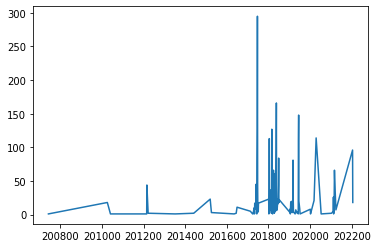

In [21]:
week_count = GEO_metadata['adjusted_week'].value_counts().sort_index()
week_count.plot()

In [22]:
temp_dict = {}
for i in range(len(week_count)):
    for j in range(len(week_count)):
        temp_dict[(week_count.index[i],week_count.index[j])] = abs(j-i)

In [23]:
temp_df = pd.DataFrame(temp_dict, ['dist']).T

In [24]:
temp_df

dist
200743 200743     0
       201026     1
       201041     2
       201215     3
       201216     4
...             ...
202205 202117     4
       202118     3
       202124     2
       202204     1
       202205     0

[13689 rows x 1 columns]

In [25]:
GEO_metadata['adjusted_week']

0       202205
1       202205
2       202205
3       202205
4       202205
         ...  
3132    201745
3133    201745
3134    201745
3135    201745
3136    202029
Name: adjusted_week, Length: 3137, dtype: int64

In [26]:
All_Edges['Week_0'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[0]].reset_index()['adjusted_week']
All_Edges['Week_1'] = GEO_metadata.set_index('index.1')['adjusted_week'].loc[All_Edges[1]].reset_index()['adjusted_week']

In [27]:
All_Edges = All_Edges.merge(temp_df, how='left', left_on=['Week_0','Week_1'], right_index=True)

In [28]:
All_Edges

,0,1,Week_0,Week_1,dist
0,51859675789,51859339946,202205,202205,0
1,51859675789,51858385807,202205,202205,0
2,51859675789,51859339546,202205,202205,0
3,51859675789,51858385377,202205,202205,0
4,51859675789,51858385192,202205,202205,0
...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81
9837628,50150116276,38397950426,202029,201745,81
9837629,50150116276,38397948496,202029,201745,81
9837630,50150116276,38454117381,202029,201745,81


In [29]:
All_Edges['Temporal_Similarity'] = abs((2-All_Edges['dist'])/2*(All_Edges['dist']<2))

In [30]:
All_Edges['Temporal_Similarity'].value_counts()

0.0    9250976
0.5     295126
1.0     291530
Name: Temporal_Similarity, dtype: int64

In [31]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity
0,51859675789,51859339946,202205,202205,0,1.0
1,51859675789,51858385807,202205,202205,0,1.0
2,51859675789,51859339546,202205,202205,0,1.0
3,51859675789,51858385377,202205,202205,0,1.0
4,51859675789,51858385192,202205,202205,0,1.0
...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0
9837628,50150116276,38397950426,202029,201745,81,0.0
9837629,50150116276,38397948496,202029,201745,81,0.0
9837630,50150116276,38454117381,202029,201745,81,0.0


In [32]:
(All_Edges['Temporal_Similarity']>0).sum()

586656

In [33]:
(All_Edges['Temporal_Similarity']==1).sum()

291530

### Social Graph

In [34]:
social_links

,User0,User1,self,friend,interest,mutual
0,57210421@N04,57210421@N04,1,1,1.000000,True
1,57210421@N04,193578629@N05,0,False,0.000000,False
2,57210421@N04,63829447@N04,0,False,0.028571,False
3,57210421@N04,193769199@N05,0,False,0.000000,False
4,57210421@N04,149416284@N07,0,False,0.000000,False
...,...,...,...,...,...,...
9020,15047208@N00,91698536@N04,0,False,0.000000,False
9021,15047208@N00,145667897@N08,0,False,0.000000,False
9022,15047208@N00,152311060@N02,0,False,0.000000,False
9023,15047208@N00,147141688@N03,0,False,0.000000,False


C:\Users\zzbn1\AppData\Local\Temp\ipykernel_30576\2726203132.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)


<AxesSubplot:>

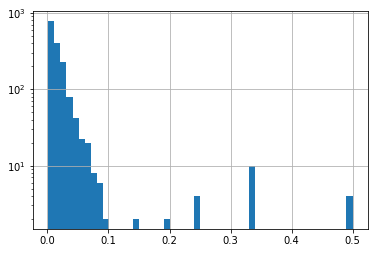

In [35]:
social_links[social_links.interest<1][social_links.interest>0]['interest'].hist(bins=50, log=True)

In [36]:
(social_links['interest']>0.05).sum()

177

In [37]:
social_links['relationship'] = ((social_links['self'].astype(int)*2 + (social_links['friend']=='True').astype(int) + (social_links['interest']>0.05).astype(int))).astype(int)

In [38]:
social_links['relationship'].value_counts()

0    8848
3      95
1      80
2       2
Name: relationship, dtype: int64

In [39]:
social_links

,User0,User1,self,friend,interest,mutual,relationship
0,57210421@N04,57210421@N04,1,1,1.000000,True,3
1,57210421@N04,193578629@N05,0,False,0.000000,False,0
2,57210421@N04,63829447@N04,0,False,0.028571,False,0
3,57210421@N04,193769199@N05,0,False,0.000000,False,0
4,57210421@N04,149416284@N07,0,False,0.000000,False,0
...,...,...,...,...,...,...,...
9020,15047208@N00,91698536@N04,0,False,0.000000,False,0
9021,15047208@N00,145667897@N08,0,False,0.000000,False,0
9022,15047208@N00,152311060@N02,0,False,0.000000,False,0
9023,15047208@N00,147141688@N03,0,False,0.000000,False,0


In [40]:
H0 = nx.from_pandas_edgelist(social_links[social_links.relationship>0], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

In [41]:
H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1', 
                            edge_attr=['self','friend','interest','relationship'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_30576\454995413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H1 = nx.from_pandas_edgelist(social_links[social_links.relationship>0][social_links.relationship<3], source='User0', target='User1',


In [42]:
len(H0.nodes)

95

In [43]:
len(H1.nodes)

26

In [44]:
len(H0.edges)

136

In [45]:
len(H1.edges)

41

In [46]:
nx.is_connected(H0)

False

In [47]:
nx.is_connected(H1)

False

In [48]:
nx.number_connected_components(H0)

73

In [49]:
nx.number_connected_components(H1)

4

In [50]:
nx.density(H0)

0.03045912653975364

In [51]:
nx.density(H1)

0.12615384615384614

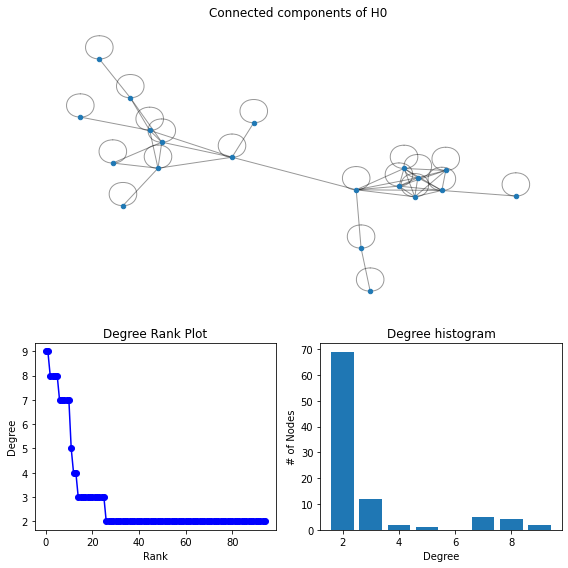

In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H0.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H0.subgraph(sorted(nx.connected_components(H0), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of H0")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [40]:
size = [GEO_metadata.groupby('owner').count()['x'].loc[v] for v in H1]

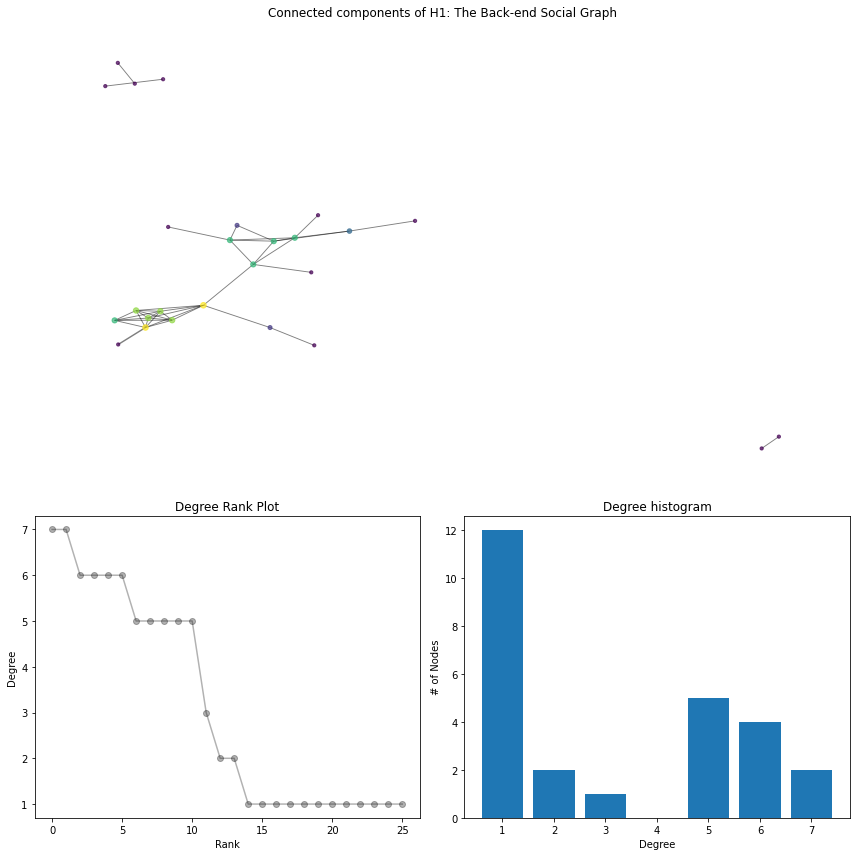

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.5, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("Connected components of H1: The Back-end Social Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

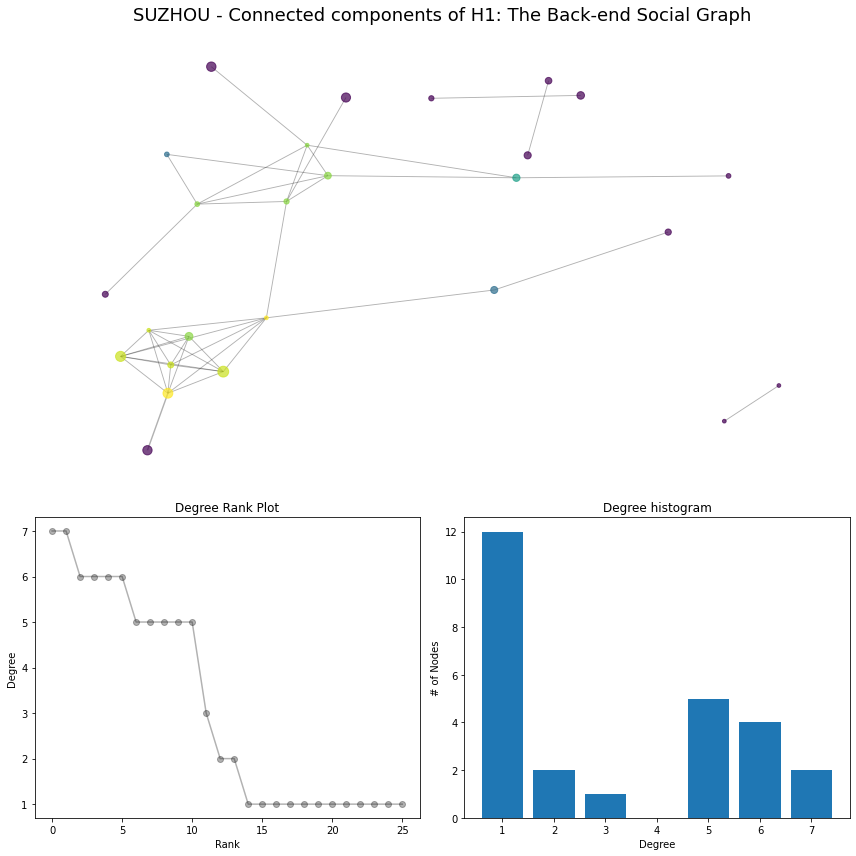

In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.5, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of H1: The Back-end Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

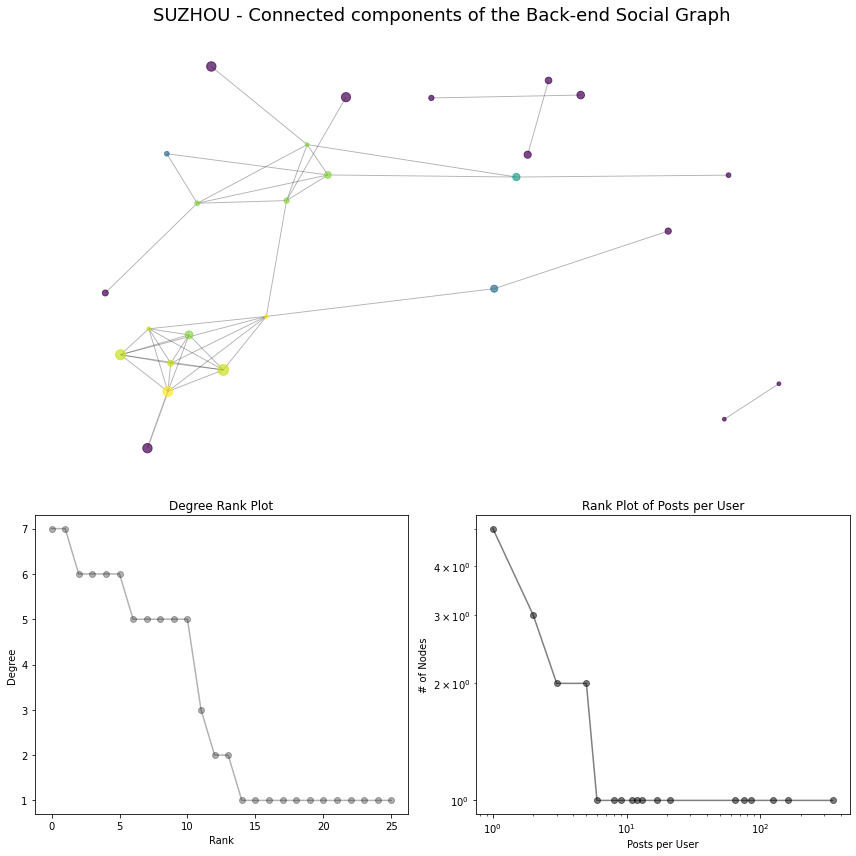

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H1.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
Gcc = H1
pos = nx.spring_layout(Gcc, seed=10396953, k=0.5, weight='relationship')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20*np.log(np.array(size)+1), 
                       node_color=[(np.log10(Gcc.degree(v))) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [3*np.log10(e[2]['relationship']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of the Back-end Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(*np.unique(size, return_counts=True),"k-", alpha=0.5,marker="o")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per User")
ax2.set_xlabel("Posts per User")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


average shortest path length 2.695

length #paths
0 20
1 76
2 82
3 98
4 82
5 36
6 6
radius: 3
diameter: 6
center: ['44104611@N05']
periphery: ['117372933@N07', '193578629@N05', '128337749@N02', '90028379@N00']
density: 0.2


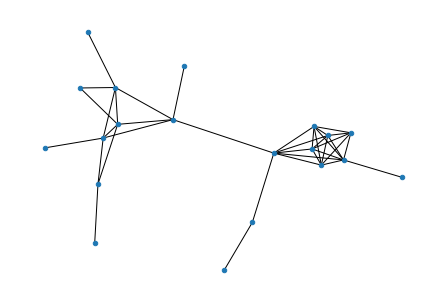

In [57]:
G=H1.subgraph(sorted(nx.connected_components(H1), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [52]:
social_links[['User0','User1','relationship']]

,User0,User1,relationship
0,57210421@N04,57210421@N04,3
1,57210421@N04,193578629@N05,0
2,57210421@N04,63829447@N04,0
3,57210421@N04,193769199@N05,0
4,57210421@N04,149416284@N07,0
...,...,...,...
9020,15047208@N00,91698536@N04,0
9021,15047208@N00,145667897@N08,0
9022,15047208@N00,152311060@N02,0
9023,15047208@N00,147141688@N03,0


In [53]:
All_Edges['User_0'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[0]].reset_index()['owner']
All_Edges['User_1'] = GEO_metadata.set_index('index.1')['owner'].loc[All_Edges[1]].reset_index()['owner']

In [54]:
All_Edges = All_Edges.merge(social_links[['User0','User1','relationship']], how='left', 
                                                 left_on=['User_0','User_1'], right_on = ['User0','User1'])

In [55]:
All_Edges = All_Edges.drop(['User0','User1'],axis=1)

In [56]:
All_Edges['Social_Similarity'] = All_Edges['relationship']/3

In [57]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000
...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333


In [58]:
(All_Edges['Social_Similarity']!=0).sum()

1205642

In [59]:
(All_Edges['Social_Similarity']==1).sum()

909664

### Spatial Graph

In [60]:
All_Edges['GEO_0'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[0]].reset_index()['GEO_node']
All_Edges['GEO_1'] = GEO_metadata.set_index('index.1')['GEO_node'].loc[All_Edges[1]].reset_index()['GEO_node']

In [61]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880
...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136


In [71]:
GEO_dict = {}
for i in GEO_node_dist.index:
    for j in GEO_node_dist.index:
        GEO_dict[(i,j)] = (GEO_node_dist[str(i)][j] + GEO_node_dist[str(j)][i])/2

In [72]:
GEO_df = pd.DataFrame(GEO_dict, ['geo_distance']).T

In [73]:
GEO_df

geo_distance
8017590880 8017590880          0.00
           430312150         368.35
           5121497166        354.65
           5481977300        408.20
           7535568662        332.20
...                             ...
1614843285 7429680794        555.70
           7848457933        418.35
           4678184340        425.80
           266775136         290.75
           1614843285          0.00

[101124 rows x 1 columns]

<AxesSubplot:>

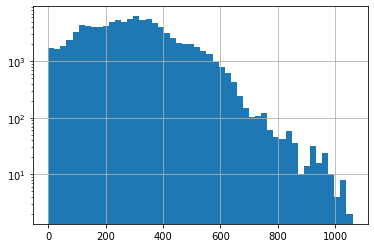

In [74]:
GEO_df[GEO_df['geo_distance']<50000]['geo_distance'].hist(log=True, bins=50)

In [75]:
GEO_df['geo_distance'].quantile(0.02)

25.2

In [76]:
(GEO_df['geo_distance']<20).sum()

1678

In [77]:
H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(), 
                             source='level_0', target='level_1', edge_attr=['geo_distance'])

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_30576\1381867291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H2 = nx.from_pandas_edgelist(GEO_df[GEO_df['geo_distance']<20][GEO_df['geo_distance']>0].reset_index(),


In [78]:
len(H2.nodes)

230

In [79]:
len(H2.edges)

680

In [80]:
nx.is_connected(H2)

False

In [81]:
nx.number_connected_components(H2)

38

In [82]:
nx.density(H2)

0.025821150560091134

In [83]:
GEO_nodes

,y,x,street_count,bc,pr,dg,cl,highway,ref,geometry
osmid,,,,,,,,,,
265589093,31.323382,120.665262,4,0.056608,0.000088,0.000552,0.003434,NaN,NaN,POINT (120.6652619 31.3233822)
8359057968,31.323263,120.665289,4,0.013852,0.000154,0.000552,0.003422,crossing,NaN,POINT (120.6652888 31.3232632)
4603625084,31.323385,120.665417,4,0.057786,0.000055,0.000552,0.003429,NaN,NaN,POINT (120.6654171 31.3233849)
265596541,31.335519,120.613620,4,0.002719,0.000141,0.000829,0.003013,NaN,NaN,POINT (120.6136198 31.3355194)
5863201788,31.335384,120.613687,4,0.002523,0.000165,0.000829,0.003025,NaN,NaN,POINT (120.6136865 31.3353841)
...,...,...,...,...,...,...,...,...,...,...
9250213634,31.345813,120.645164,3,0.000087,0.000057,0.000276,0.001460,NaN,NaN,POINT (120.6451638 31.3458128)
8617095512,31.347170,120.633701,3,0.000000,0.000108,0.000138,0.002837,NaN,NaN,POINT (120.6337005 31.3471699)
9250213609,31.345122,120.647846,3,0.001047,0.000144,0.000414,0.002387,NaN,NaN,POINT (120.6478459 31.3451225)


In [84]:
GEO_metadata['GEO_node']

0       8017590880
1       8017590880
2       8017590880
3       8017590880
4       8017590880
           ...    
3132    7235832135
3133    7235832135
3134    7235832136
3135    8426347435
3136    4938223167
Name: GEO_node, Length: 3137, dtype: int64

In [85]:
size = [GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2]

In [86]:
len(size)

230

In [67]:
len([10*np.log(Gcc.degree(v)+1) for v in Gcc])

26

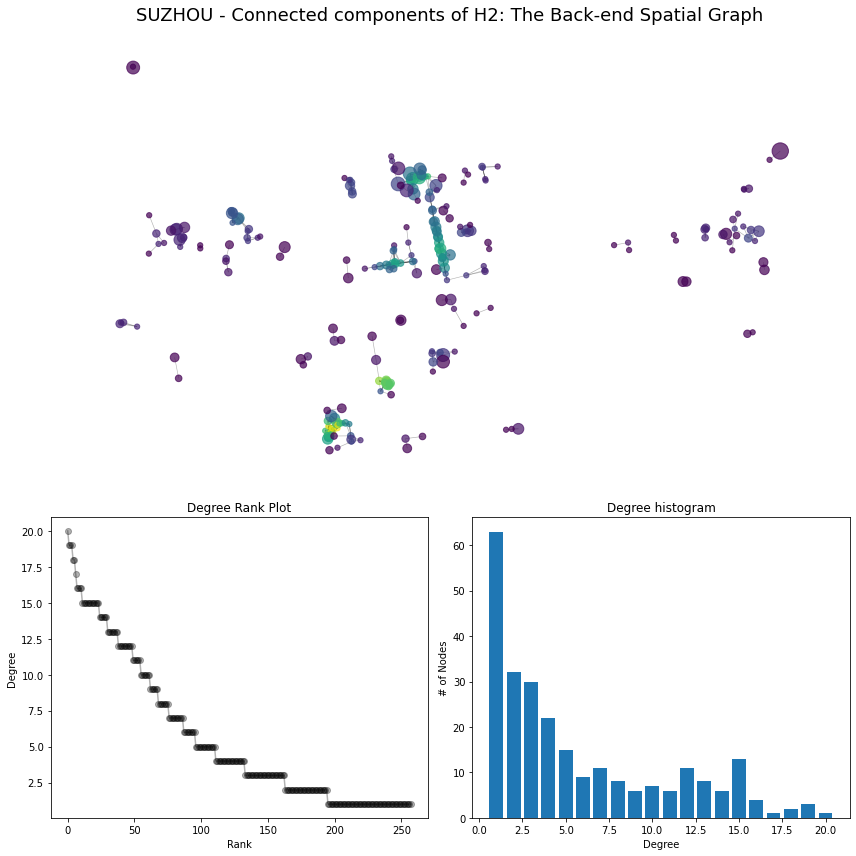

In [85]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of H2: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [87]:
size_p = -np.array(size)
size_p.sort()
size_p = -size_p

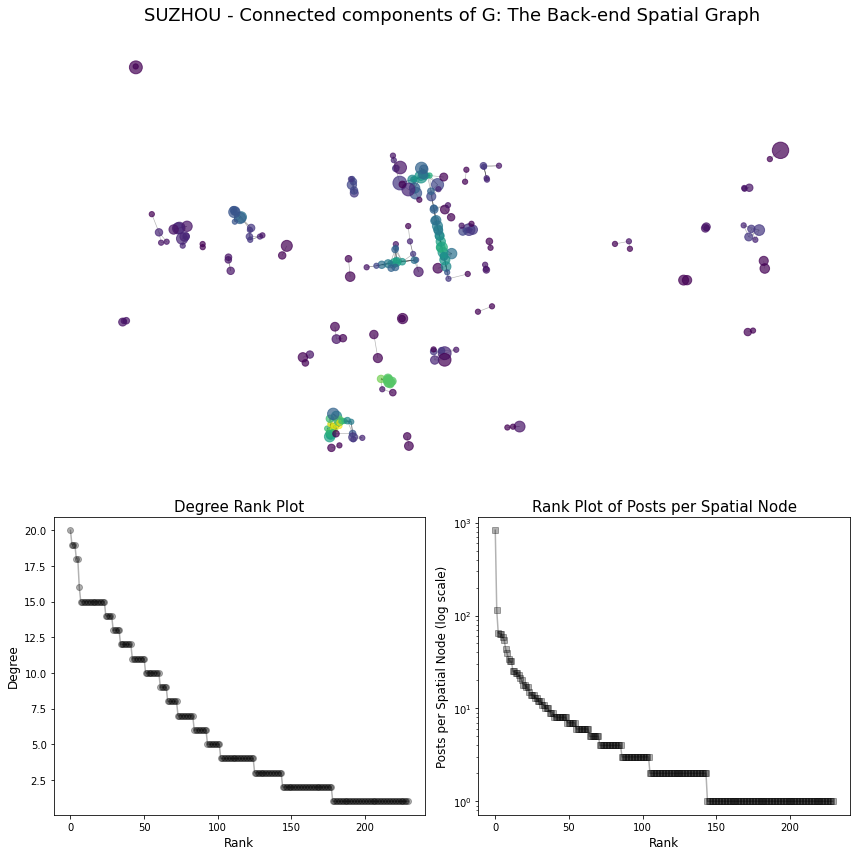

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in H2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
Gcc = H2
pos = {v: np.array((GEO_nodes.loc[v]['x'],GEO_nodes.loc[v]['y'])) for v in H2}
#size = {v: GEO_metadata.groupby('GEO_node').count()['x'].loc[v] for v in H2}
#pos = nx.spring_layout(Gcc, seed=10396953, k=0.15, weight='geo_distance')
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=np.log(np.array(size)+1)*40, 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.7)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.3, width = [0.5*np.log10(e[2]['geo_distance']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G: The Back-end Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.3,marker="o")
ax1.set_title("Degree Rank Plot",size=15)
ax1.set_ylabel("Degree",size=12)
ax1.set_xlabel("Rank",size=12)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.plot(size_p, "k-", alpha=0.3, marker="s")
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_title("Rank Plot of Posts per Spatial Node",size=15)
ax2.set_xlabel("Rank",size=12)
ax2.set_ylabel("Posts per Spatial Node (log scale)",size=12)

fig.tight_layout()
plt.show()


average shortest path length 4.470743801652892

length #paths
0 55
1 414
2 402
3 392
4 390
5 338
6 324
7 240
8 182
9 162
10 68
11 34
12 24
radius: 6
diameter: 12
center: [4713823520, 3762442398]
periphery: [7745754911, 7745754912, 4451401528, 4778201457, 4778201460, 4451401595, 4926191871]
density: 0.1393939393939394


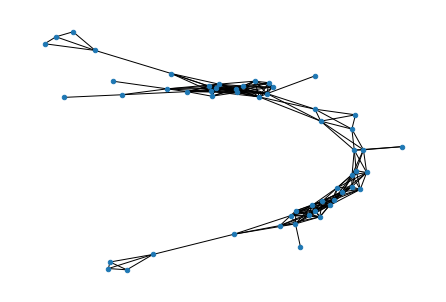

In [86]:
G=H2.subgraph(sorted(nx.connected_components(H2), key=len, reverse=True)[0])
pathlengths = []

#print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    #print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
#print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=False, node_size=20)
plt.show()

In [89]:
All_Edges = All_Edges.merge(GEO_df, how='left', left_on=['GEO_0','GEO_1'], right_index=True)

In [90]:
All_Edges

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440,611.95
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.85
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.85
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136,602.45


<AxesSubplot:>

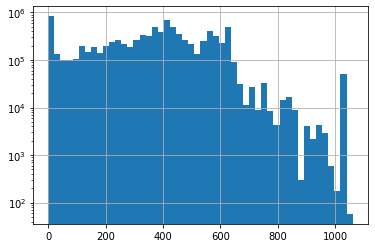

In [91]:
All_Edges[All_Edges.geo_distance<50000]['geo_distance'].hist(log=True, bins=50)

In [92]:
All_Edges['Spatial_Similarity'] = abs((20-All_Edges['geo_distance'])/20 * (All_Edges['geo_distance']<=20)).fillna(0)

In [93]:
All_Edges['One_Edge'] = (All_Edges['Spatial_Similarity']+All_Edges['Social_Similarity']+All_Edges['Temporal_Similarity'])>0

In [94]:
All_Edges['Same_Node'] = All_Edges[0]==All_Edges[1]

In [95]:
All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_30576\3347584611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  All_Edges_Graph = All_Edges[All_Edges['One_Edge']][~All_Edges['Same_Node']]


In [96]:
All_Edges_Graph

,0,1,Week_0,Week_1,dist,Temporal_Similarity,User_0,User_1,relationship,Social_Similarity,GEO_0,GEO_1,geo_distance,Spatial_Similarity,One_Edge,Same_Node
0,51859675789,51859339946,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00,1.0,True,False
1,51859675789,51858385807,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00,1.0,True,False
2,51859675789,51859339546,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00,1.0,True,False
3,51859675789,51858385377,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00,1.0,True,False
4,51859675789,51858385192,202205,202205,0,1.0,57210421@N04,57210421@N04,3,1.000000,8017590880,8017590880,0.00,1.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837627,50150116276,38397950826,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,8426347440,611.95,0.0,True,False
9837628,50150116276,38397950426,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.85,0.0,True,False
9837629,50150116276,38397948496,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832135,603.85,0.0,True,False
9837630,50150116276,38454117381,202029,201745,81,0.0,57210421@N04,28571579@N03,1,0.333333,4938223167,7235832136,602.45,0.0,True,False


In [97]:
(All_Edges_Graph['Spatial_Similarity']!=0).sum()

830098

In [98]:
(All_Edges_Graph['Spatial_Similarity']==1).sum()

778408

In [99]:
All_Edges_Graph.to_csv('Suzhou/data_storage/Edge_List.csv', sep='\t')

In [3]:
All_Edges_Graph = pd.read_csv('Suzhou/data_storage/Edge_List.csv', sep='\t', index_col='Unnamed: 0')

### Construction and Analysis on Graphs

In [100]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0][[0,1,'Temporal_Similarity','Week_0','Week_1']], 
                             source=0, target=1,edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [4]:
G1 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Temporal_Similarity>0].loc[:,['0','1','Temporal_Similarity','Week_0','Week_1']], 
                             source='0', target='1',edge_attr=['Temporal_Similarity','Week_0','Week_1'])

In [5]:
len(G1.nodes)

3137

In [6]:
len(G1.edges)

293328

In [103]:
nx.is_connected(G1)

True

In [104]:
nx.density(G1)

0.059633863108520424

In [103]:
pos_1 = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}

In [105]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0][[0,1,'Social_Similarity','User_0','User_1','relationship']], 
                             source=0, target=1,edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [7]:
G2 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Social_Similarity>0].loc[:,['0','1','Social_Similarity','User_0','User_1','relationship']], 
                             source='0', target='1',edge_attr=['Social_Similarity','User_0','User_1','relationship'])

In [8]:
len(G2.nodes)

3120

In [9]:
len(G2.edges)

602821

In [108]:
nx.is_connected(G2)

False

In [10]:
nx.number_connected_components(G2)

56

In [11]:
[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)]

[942,
 730,
 304,
 251,
 124,
 72,
 62,
 62,
 54,
 51,
 51,
 49,
 30,
 26,
 25,
 23,
 20,
 20,
 16,
 16,
 14,
 14,
 13,
 12,
 12,
 11,
 9,
 7,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [110]:
nx.density(G2)

0.12389346519676754

In [111]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0][[0,1,'Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source=0, target=1,edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [12]:
G3 = nx.from_pandas_edgelist(All_Edges_Graph[All_Edges_Graph.Spatial_Similarity>0].loc[:,['0','1','Spatial_Similarity','GEO_0','GEO_1','geo_distance']], 
                             source='0', target='1',edge_attr=['Spatial_Similarity','GEO_0','GEO_1','geo_distance'])

In [13]:
len(G3.nodes)

3102

In [14]:
len(G3.edges)

415049

In [114]:
nx.is_connected(G3)

False

In [15]:
nx.number_connected_components(G3)

91

In [16]:
[len(c) for c in sorted(nx.connected_components(G3), key=len, reverse=True)]

[829,
 597,
 136,
 134,
 114,
 113,
 92,
 81,
 71,
 65,
 54,
 48,
 45,
 41,
 36,
 34,
 32,
 29,
 27,
 26,
 23,
 22,
 21,
 20,
 19,
 19,
 19,
 19,
 16,
 16,
 15,
 15,
 13,
 12,
 12,
 11,
 11,
 9,
 9,
 9,
 9,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [116]:
nx.density(G3)

0.08629503471249785

In [117]:
G = nx.MultiGraph()

In [118]:
G = nx.compose(nx.compose(G1,G2),G3)

In [119]:
len(G.nodes)

3137

In [120]:
len(G.edges)

916496

In [121]:
nx.is_connected(G)

True

In [122]:
nx.density(G)

0.18632451386675167

In [122]:
pos = nx.spring_layout(G, seed=10396953, k=1)

In [123]:
len(pos)

3137

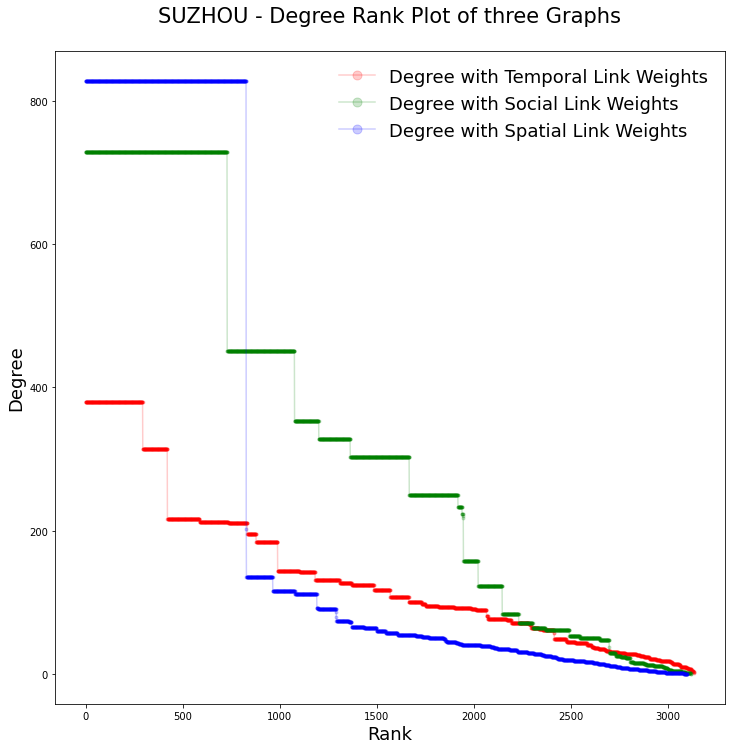

In [123]:
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')

ax.set_title("SUZHOU - Degree Rank Plot of three Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

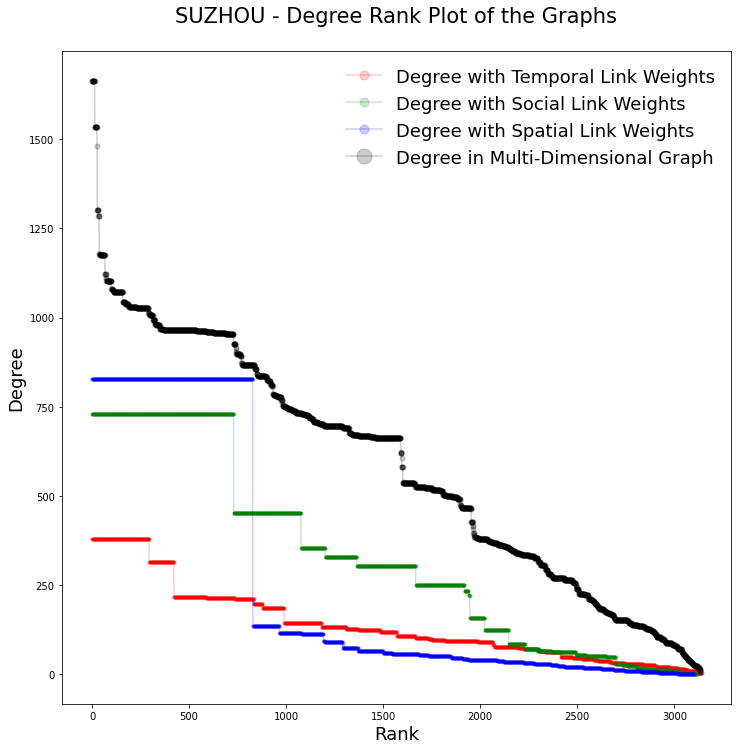

In [124]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Link Weights')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Link Weights')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Link Weights')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("SUZHOU - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

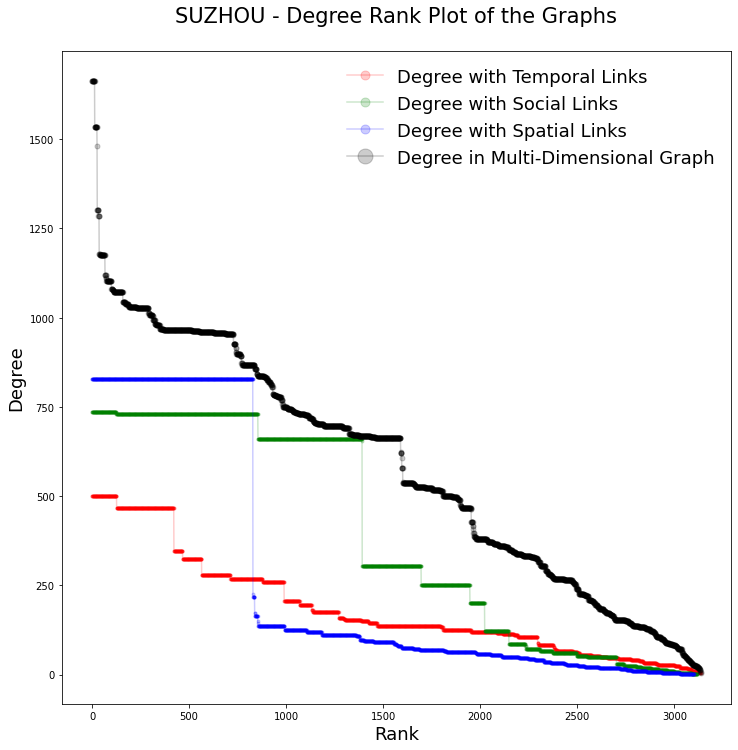

In [125]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
ax = fig.add_subplot()
degree_sequence_1 = sorted((d for n, d in G1.degree()), reverse=True)
degree_sequence_2 = sorted((d for n, d in G2.degree()), reverse=True)
degree_sequence_3 = sorted((d for n, d in G3.degree()), reverse=True)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

dmax = max(degree_sequence_1+degree_sequence_2+degree_sequence_3)
plt.plot(degree_sequence_1, "r-", alpha=0.2, marker="o", markersize=3, label='Degree with Temporal Links')
plt.plot(degree_sequence_2, "g-", alpha=0.2, marker="o", markersize=3, label='Degree with Social Links')
plt.plot(degree_sequence_3, "b-", alpha=0.2, marker="o", markersize=3, label='Degree with Spatial Links')
plt.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=5, label='Degree in Multi-Dimensional Graph')

ax.set_title("SUZHOU - Degree Rank Plot of the Graphs\n",size=21)
ax.set_ylabel("Degree",size=18)
ax.set_xlabel("Rank",size=18)

ax.legend(fontsize=18, markerscale=3,frameon=False)

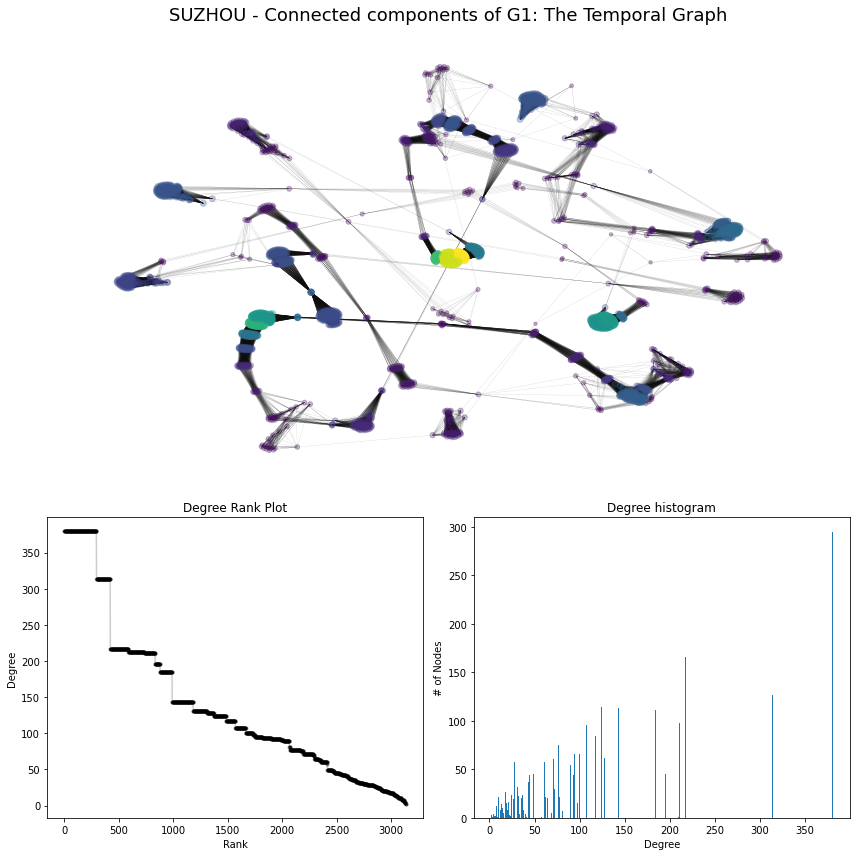

In [124]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G1.degree(weight='Temporal_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
Gcc = G1
pos_2 = nx.spring_layout(G1, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Temporal_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G1: The Temporal Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

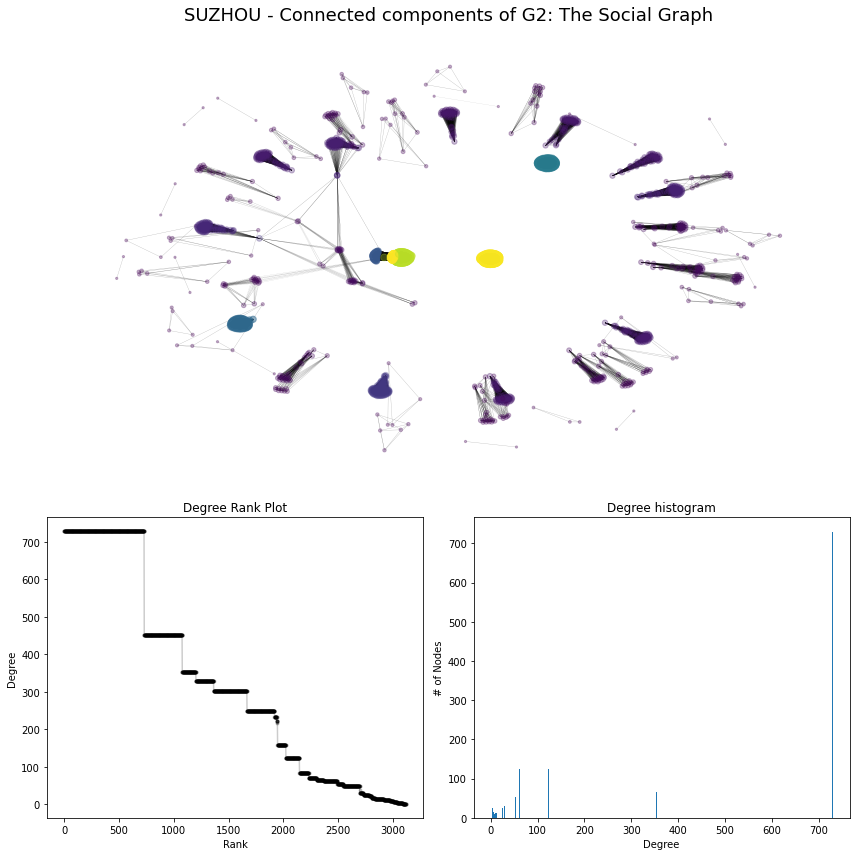

In [125]:
port networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G2.degree(weight='Social_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
Gcc = G2
pos_2 = nx.spring_layout(G2, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Social_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G2: The Social Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

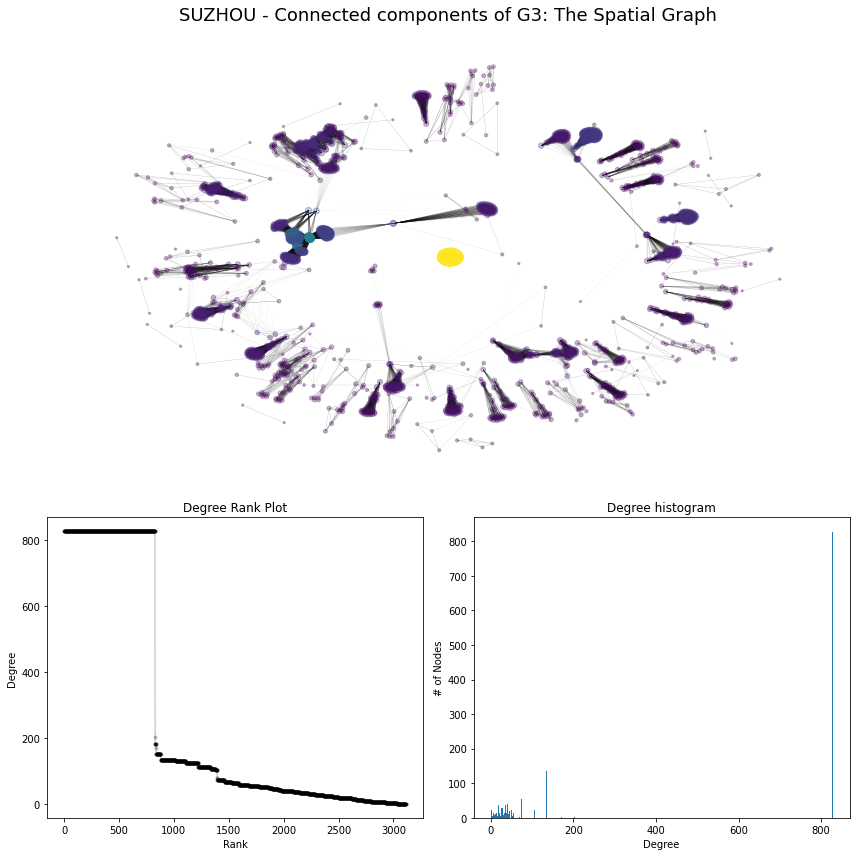

In [126]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in G3.degree(weight='Spatial_Similarity')), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
Gcc = G3
pos_2 = nx.spring_layout(G3, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[5*np.log2(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.3, width = [np.log10(e[2]['Spatial_Similarity']+1) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G3: The Spatial Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [127]:
GM = nx.MultiGraph()

In [128]:
GM.add_weighted_edges_from([e for e in G1.edges(data=True)])
GM.add_weighted_edges_from([e for e in G2.edges(data=True)])
GM.add_weighted_edges_from([e for e in G3.edges(data=True)])

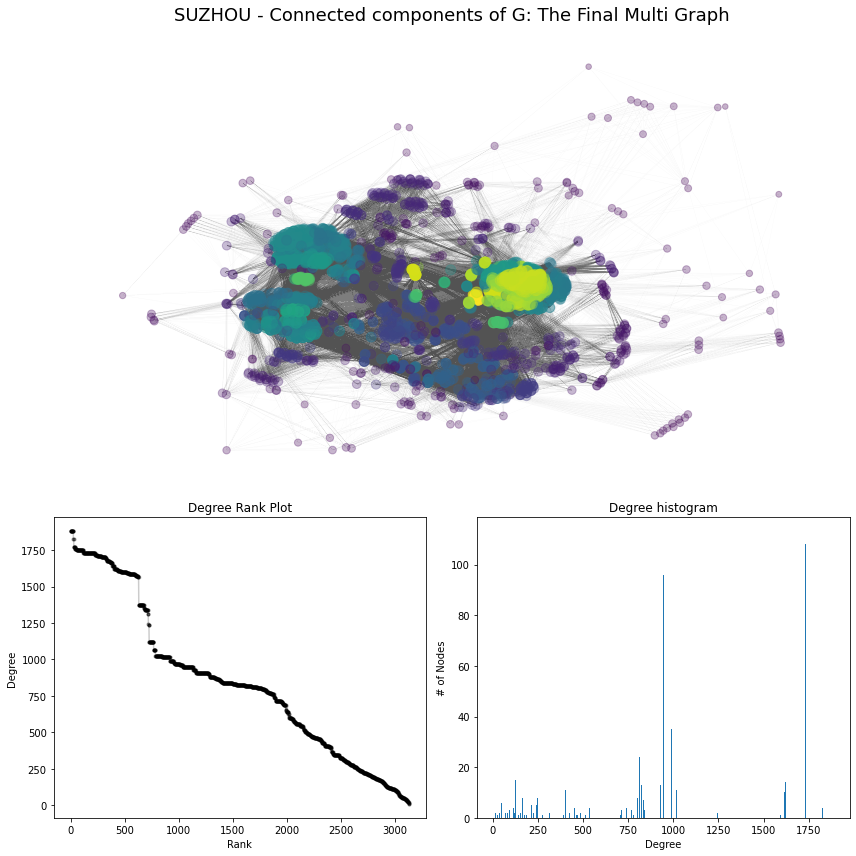

In [129]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

degree_sequence = sorted((d for n, d in GM.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = GM.subgraph(sorted(nx.connected_components(GM), key=len, reverse=True)[0])
Gcc = GM
pos_2 = nx.spring_layout(G, seed=10396953, k=0.1)
#pos = {v: np.array((GEO_metadata.set_index('index.1').loc[v]['x'],GEO_metadata.set_index('index.1').loc[v]['y'])) for v in G1}
nx.draw_networkx_nodes(Gcc, pos_2, ax=ax0, node_size=[15*np.log(Gcc.degree(v)+1) for v in Gcc], 
                       node_color=[(0.1*Gcc.degree(v)) for v in Gcc], alpha=0.3)
nx.draw_networkx_edges(Gcc, pos_2, ax=ax0, alpha=0.03, width = [0.1*len(e) for e in Gcc.edges(data=True)])
ax0.set_title("SUZHOU - Connected components of G: The Final Multi Graph", size=18)
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "k-", alpha=0.2, marker="o", markersize=3)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [130]:
len(GM.nodes)

3137

In [131]:
len(GM.edges)

1331142

In [132]:
nx.density(GM)

0.2706224424739612

In [133]:
nx.is_connected(GM)

True

In [134]:
nx.is_weighted(GM)

True

In [135]:
nx.is_weighted(G2)

False

In [183]:
A1 = nx.adjacency_matrix(G1, weight='Temporal_Similarity')
A2 = nx.adjacency_matrix(G2, weight='Social_Similarity')
A3 = nx.adjacency_matrix(G3, weight='Spatial_Similarity')